In [1]:
import os
import torch
import json
import matplotlib.pyplot as plt
import pandas as pd
from datasets import Dataset
from PIL import Image
import numpy as np
import torchvision.transforms as transforms

In [2]:
# Path to the clients_dataset folder
client_dataset_path = r"/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/data/clients_dataset"
# No. of Clients
num_clients = len([f for f in os.listdir(client_dataset_path) if os.path.isdir(os.path.join(client_dataset_path, f))])
num_clients

10

In [3]:
# List to store the client datasets
client_train_datasets = {}
client_val_dataset = {}

# Loop over each client folder (client_0 to client_9)
for client_id in range(num_clients):
    client_folder = f"client_{client_id}"
    
    train_file = os.path.join(client_dataset_path, client_folder, "train_data.pt")
    val_file = os.path.join(client_dataset_path, client_folder, "val_data.pt")
    
    # Load data for each client
    train_data = torch.load(train_file)
    val_data = torch.load(val_file)
    
    # Create a Dataset for the client
    client_train_datasets[client_folder] = pd.DataFrame({
        'image': [train_data[i]['image'] for i in range(len(train_data))],
        'label': [train_data[i]['label'] for i in range(len(train_data))]
    })
    client_val_dataset[client_folder] = pd.DataFrame({
        'image': [val_data[i]['image'] for i in range(len(val_data))],
        'label': [val_data[i]['label'] for i in range(len(val_data))]
    })

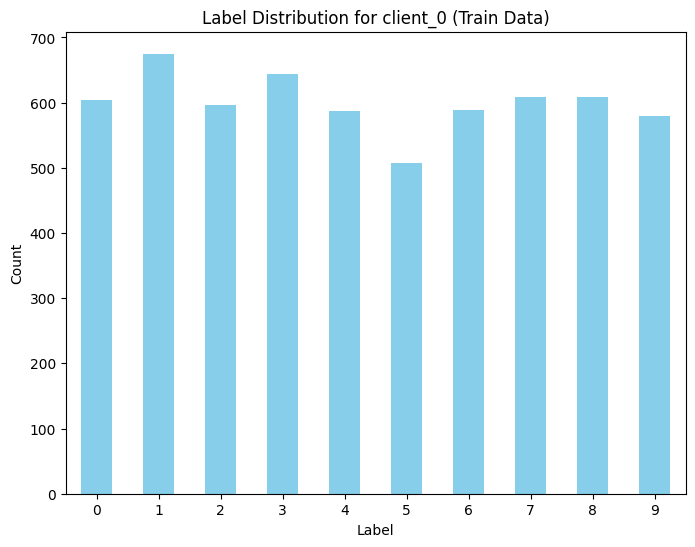

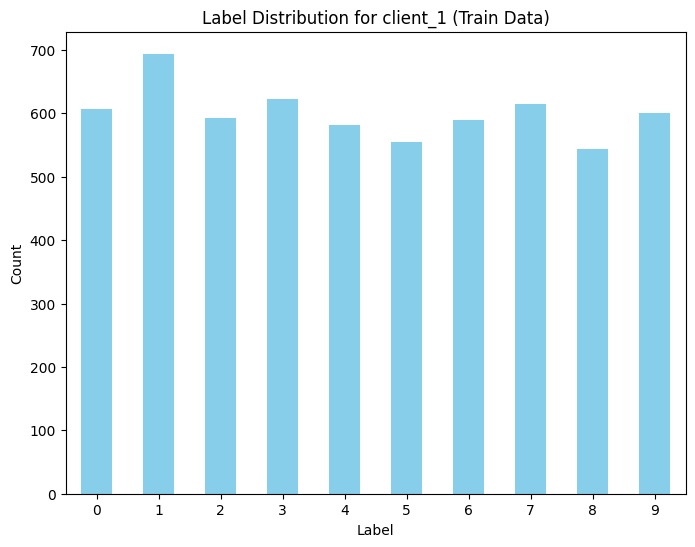

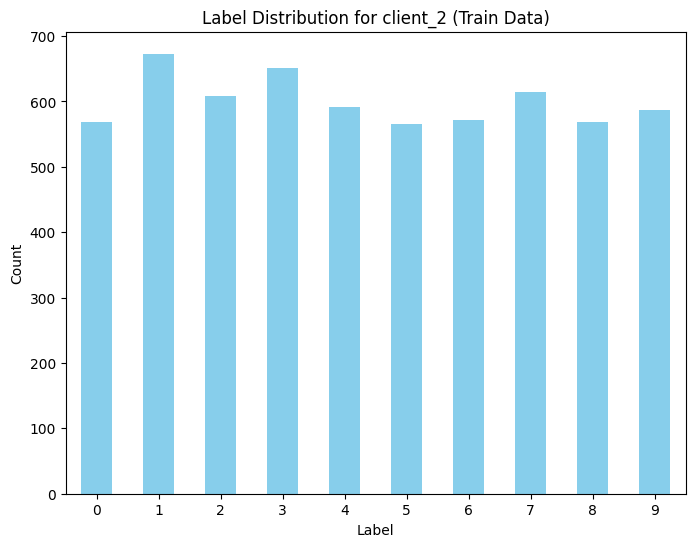

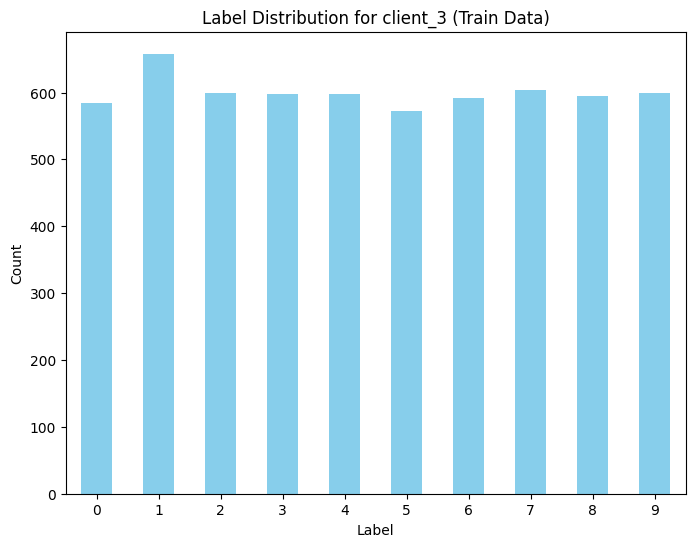

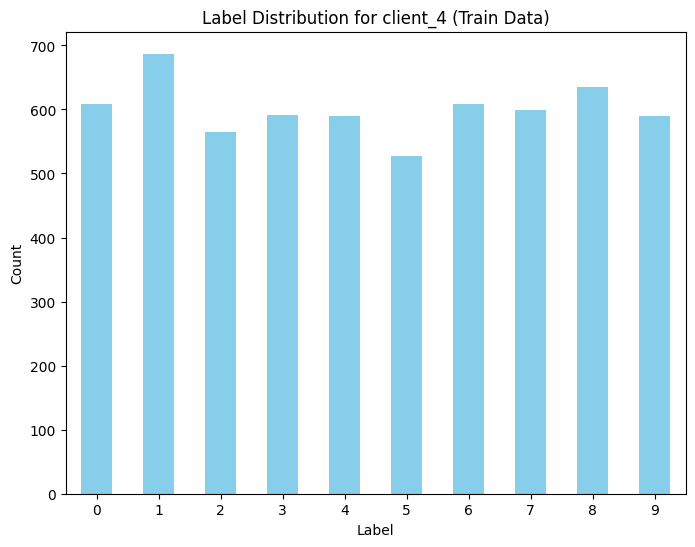

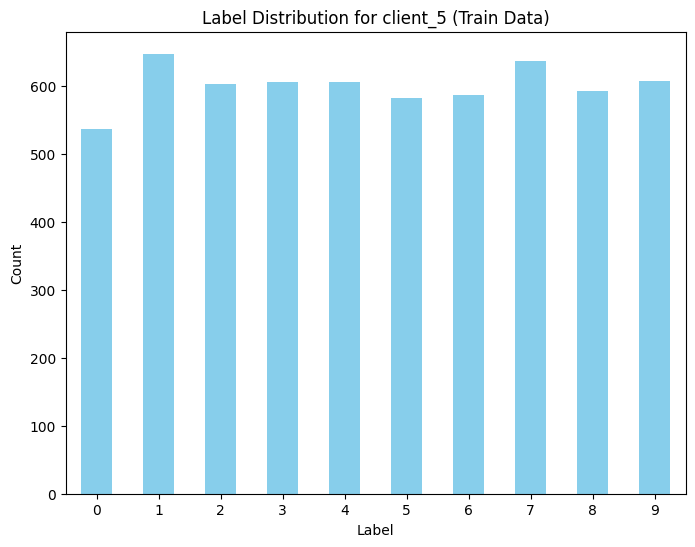

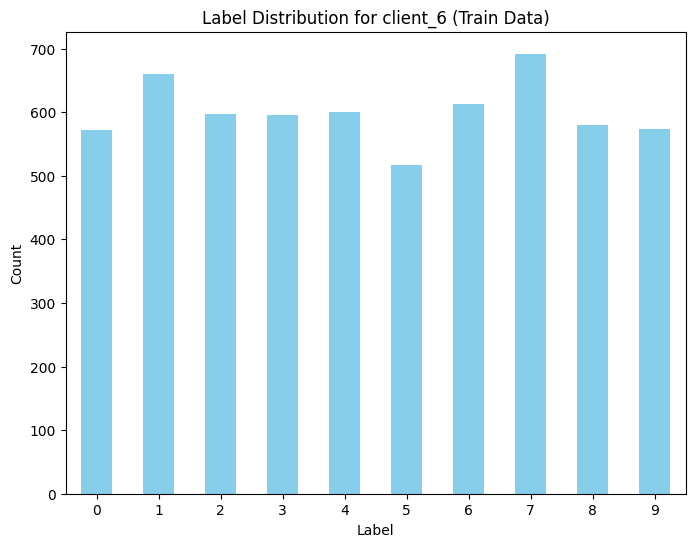

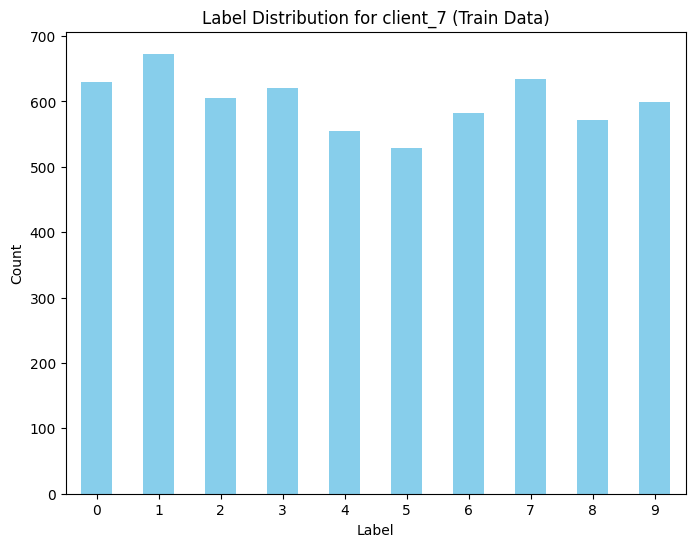

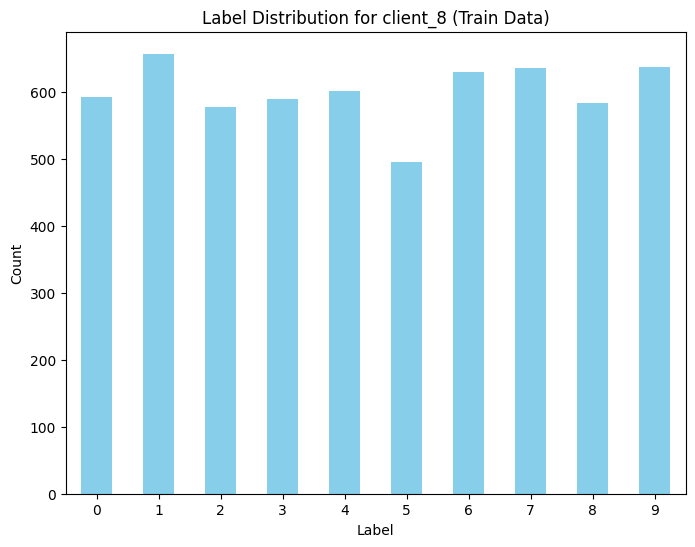

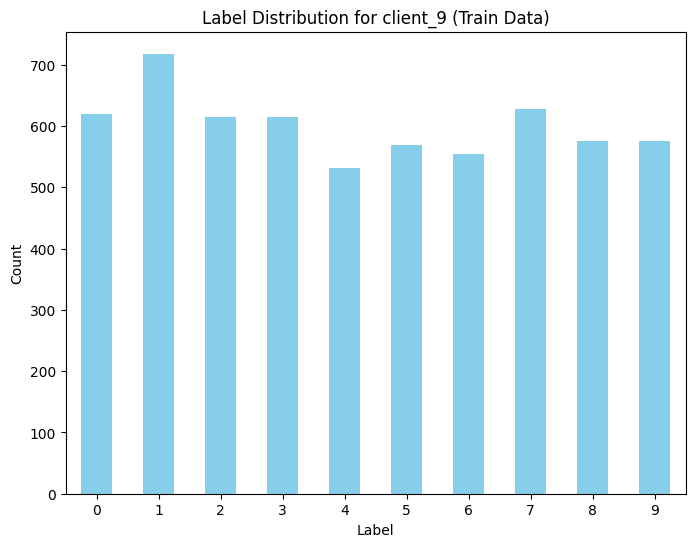

In [4]:
# Now plot the label distribution for each client
for client_folder, train_df in client_train_datasets.items():
    plt.figure(figsize=(8, 6))
    train_df['label'].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(f'Label Distribution for {client_folder} (Train Data)')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

In [5]:
# to_pil = transforms.ToPILImage()
# pil_image = to_pil(df_train.image[0])

# # Show the image
# pil_image.show()

In [6]:
client_train_datasets['client_1'].label.value_counts()

1    694
3    623
7    614
0    607
9    600
2    592
6    590
4    581
5    555
8    544
Name: label, dtype: int64

# Index Validation

In [24]:
drift_client_dataset_path = r"/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/data/clients_drift_dataset_indexes"
json_folder = [f for f in os.listdir(drift_client_dataset_path) if os.path.isdir(os.path.join(drift_client_dataset_path, f))]
num_drifted_clients_json = len(json_folder)
num_drifted_clients_json

3

In [25]:
drift_client_train_json = {}
drift_client_val_json = {}

for folder in json_folder:
    client_folder = folder
    
    train_json_file = os.path.join(drift_client_dataset_path, client_folder, "train_data.json")
    val_json_file = os.path.join(drift_client_dataset_path, client_folder, "val_data.json")
    
    with open(train_json_file, 'r') as file:
        train_indices_list = json.load(file)
    drift_client_train_json[client_folder] = train_indices_list
    with open(val_json_file, 'r') as file:
        val_indices_list = json.load(file)
    drift_client_val_json[client_folder] = val_indices_list

In [26]:
len(drift_client_train_json['client_1'])

1077

In [27]:
len(set(drift_client_train_json['client_1']))

926

In [28]:
len(drift_client_val_json['client_1'])

1075

In [29]:
len(set(drift_client_val_json['client_1']))

412

# Case 1: Client Drifted DataSet

In [30]:
drift_client_dataset_path = r"/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/data/clients_drifted_dataset"
drift_folder = [f for f in os.listdir(drift_client_dataset_path) if os.path.isdir(os.path.join(drift_client_dataset_path, f))]
num_drifted_clients = len(drift_folder)
num_drifted_clients

0

In [14]:
# List to store the client datasets
drift_client_train_datasets = {}
drift_client_val_dataset = {}

# Loop over each client folder (client_0 to client_9)
for folder in drift_folder:
    client_folder = folder
    
    train_file = os.path.join(drift_client_dataset_path, client_folder, "train_data.pt")
    val_file = os.path.join(drift_client_dataset_path, client_folder, "val_data.pt")
    
    # Load data for each client
    train_data = torch.load(train_file)
    val_data = torch.load(val_file)
    
    # Create a Dataset for the client
    drift_client_train_datasets[client_folder] = pd.DataFrame({
        'image': [train_data[i]['image'] for i in range(len(train_data))],
        'label': [train_data[i]['label'] for i in range(len(train_data))]
    })
    drift_client_val_dataset[client_folder] = pd.DataFrame({
        'image': [val_data[i]['image'] for i in range(len(val_data))],
        'label': [val_data[i]['label'] for i in range(len(val_data))]
    })

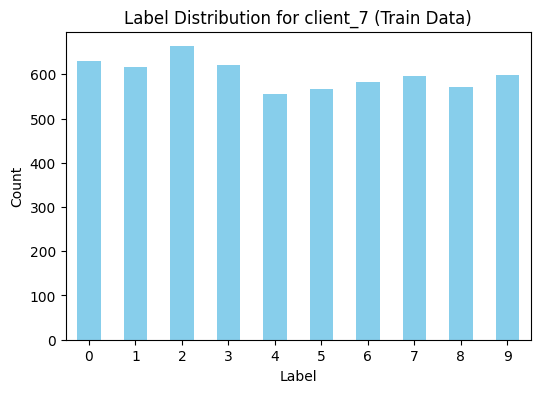

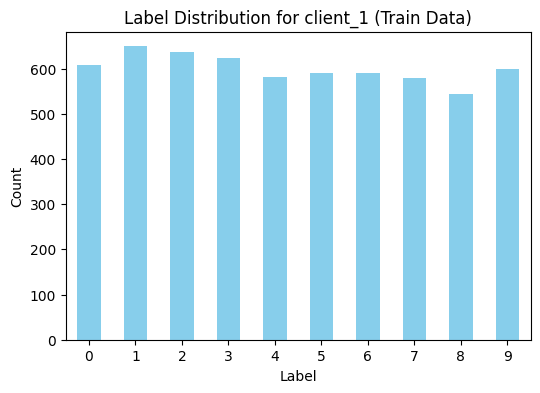

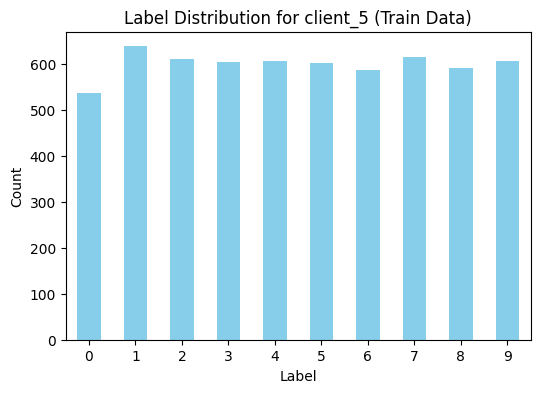

In [15]:
# Now plot the label distribution for each client
for client_folder, train_df in drift_client_train_datasets.items():
    plt.figure(figsize=(6, 4))
    train_df['label'].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(f'Label Distribution for {client_folder} (Train Data)')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

In [16]:
drift_client_train_datasets['client_1'].label.value_counts()

1    649
2    637
3    623
0    607
9    600
5    591
6    590
4    581
7    578
8    544
Name: label, dtype: int64

### Index data and dift data intersection

In [17]:
drift_client_train_datasets['client_1'].iloc[list(dict.fromkeys(drift_client_train_json['client_1']))]

,image,label
1532,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",2
1910,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",5
4533,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",7
2140,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",2
3829,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",7
...,...,...
4452,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",1
5884,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",1
4304,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",1
4006,"[[[tensor(-1.), tensor(-1.), tensor(-1.), tens...",5


In [18]:
drift_client_train_datasets['client_1'].iloc[list(dict.fromkeys(drift_client_train_json['client_1']))].label.value_counts()

2    247
5    221
1    202
7    185
Name: label, dtype: int64

In [19]:
drift_client_train_datasets['client_1']['label'][1910]

5

In [20]:
to_pil = transforms.ToPILImage()
pil_image = to_pil(drift_client_train_datasets['client_1']['image'][1910])

# Show the image
pil_image.show()

# Case 2: Client Remaining Dataset

In [34]:
drift_rem_client_dataset_path = r"/Users/amankumar/Documents/MS/Sem3/Masters Project/FedRRT_CD/src/data/clients_remaining_dataset"
drift_rem_folder = [f for f in os.listdir(drift_rem_client_dataset_path) if os.path.isdir(os.path.join(drift_rem_client_dataset_path, f))]
num_rem_drifted_clients = len(drift_rem_folder)
num_rem_drifted_clients

3

In [35]:
# List to store the client datasets
drift_rem_client_train_datasets = {}
drift_rem_client_val_dataset = {}

# Loop over each client folder (client_0 to client_9)
for folder in drift_rem_folder:
    client_folder = folder
    
    train_file = os.path.join(drift_rem_client_dataset_path, client_folder, "train_data.pt")
    val_file = os.path.join(drift_rem_client_dataset_path, client_folder, "val_data.pt")
    
    # Load data for each client
    train_data = torch.load(train_file)
    val_data = torch.load(val_file)
    
    # Create a Dataset for the client
    drift_rem_client_train_datasets[client_folder] = pd.DataFrame({
        'image': [train_data[i]['image'] for i in range(len(train_data))],
        'label': [train_data[i]['label'] for i in range(len(train_data))]
    })
    drift_rem_client_val_dataset[client_folder] = pd.DataFrame({
        'image': [val_data[i]['image'] for i in range(len(val_data))],
        'label': [val_data[i]['label'] for i in range(len(val_data))]
    })

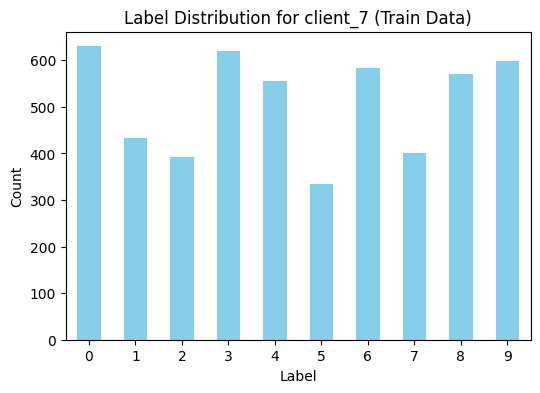

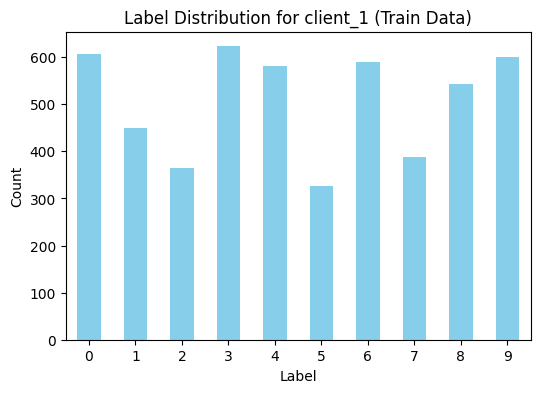

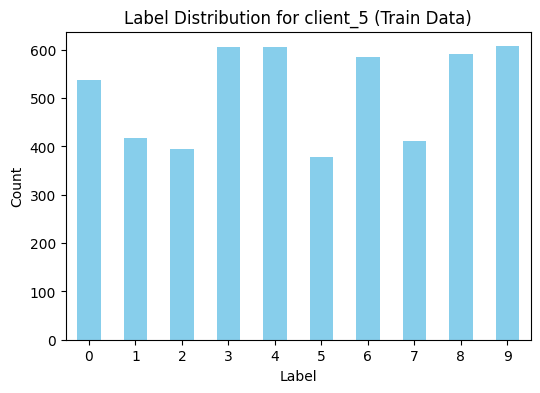

In [36]:
# Now plot the label distribution for each client
for client_folder, train_df in drift_rem_client_train_datasets.items():
    plt.figure(figsize=(6, 4))
    train_df['label'].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title(f'Label Distribution for {client_folder} (Train Data)')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

In [37]:
drift_rem_client_train_datasets['client_1'].label.value_counts()

3    623
0    607
9    600
6    590
4    581
8    544
1    450
7    388
2    364
5    327
Name: label, dtype: int64

In [38]:
drift_rem_client_train_datasets['client_1'].shape

(5074, 2)

### Index data and remaning data intersection

In [39]:
drift_rem_set = list(dict.fromkeys(drift_client_val_json['client_1']))
drift_rem_client_val_dataset['client_1'].iloc[drift_rem_set].label.value_counts()

1    133
2    100
7     91
5     88
Name: label, dtype: int64

# Plots

### Global Model

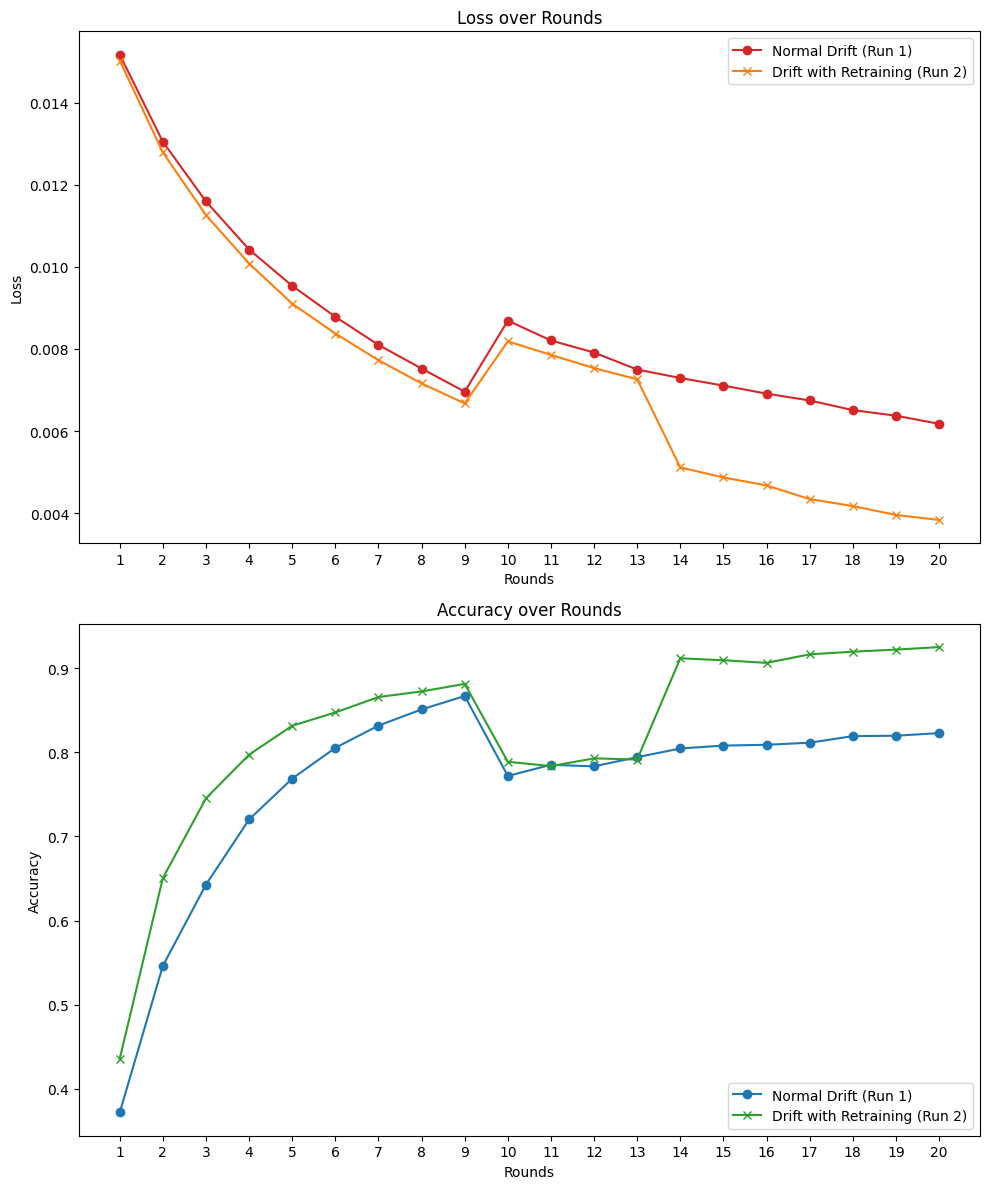

In [40]:
# Updated Loss values for Run 1 (Normal Drift)
loss_1 = [
    0.015175658874213696, 0.01305105648934841, 0.011596058644354344, 0.010425115451216698,
    0.009539247490465641, 0.008784607481211425, 0.00809959108941257, 0.0075231339503079656,
    0.006959617771208286, 0.008691099602729083, 0.00820762668736279, 0.007912819534540176,
    0.007499008169397712, 0.0072928326670080425, 0.00710805544629693, 0.006911643780767918,
    0.006745387986302376, 0.0065105230268090964, 0.006374124414287507, 0.006176536986604333
]

# Updated Accuracy values for Run 1 (Normal Drift)
accuracy_1 = [
    0.37203125, 0.54625, 0.6428125, 0.72015625, 0.76875, 0.8053125, 0.83171875, 0.8509375,
    0.866875, 0.771875, 0.78515625, 0.78328125, 0.79421875, 0.80453125, 0.80796875, 0.80890625,
    0.81140625, 0.81921875, 0.8196875, 0.8228125
]

# Updated Loss values for Run 2 (Drift with Retraining)
loss_2 = [
    0.015030272249132394, 0.012789890132844449, 0.011261719446629286, 0.010083378292620182,
    0.009103716388344764, 0.008376744352281093, 0.007726976694539189, 0.0071608048677444455,
    0.006674220925197006, 0.00818547043018043, 0.007856852393597364, 0.007533199787139892,
    0.0072616961132735015, 0.005112980687990785, 0.004868163065984845, 0.0046740564703941345,
    0.0043408107478171585, 0.0041719941888004545, 0.003954385695978999, 0.003832958983257413
]

# Updated Accuracy values for Run 2 (Drift with Retraining)
accuracy_2 = [
    0.43578125, 0.650625, 0.7453125, 0.7971875, 0.8315625, 0.84734375, 0.865625, 0.87234375,
    0.88125, 0.78875, 0.78359375, 0.7928125, 0.79140625, 0.91171875, 0.909375, 0.90625,
    0.91640625, 0.91953125, 0.92203125, 0.925
]

# Round numbers for both runs
rounds = list(range(1, 21))

# Create subplots: one for loss and one for accuracy
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot loss for both runs
ax1.plot(rounds, loss_1, color='tab:red', label='Normal Drift (Run 1)', linestyle='-', marker='o')
ax1.plot(rounds, loss_2, color='tab:orange', label='Drift with Retraining (Run 2)', linestyle='-', marker='x')
ax1.set_title('Loss over Rounds')
ax1.set_xlabel('Rounds')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper right')
ax1.set_xticks(rounds)  # Ensure integer x-axis values

# Plot accuracy for both runs
ax2.plot(rounds, accuracy_1, color='tab:blue', label='Normal Drift (Run 1)', linestyle='-', marker='o')
ax2.plot(rounds, accuracy_2, color='tab:green', label='Drift with Retraining (Run 2)', linestyle='-', marker='x')
ax2.set_title('Accuracy over Rounds')
ax2.set_xlabel('Rounds')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='lower right')
ax2.set_xticks(rounds)  # Ensure integer x-axis values

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

### Local Models 